In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
import pathlib

data_dir = './ECG_image/training'
data_dir = pathlib.Path(data_dir)
data_valid_dir = './ECG_image/validation'

In [36]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8497


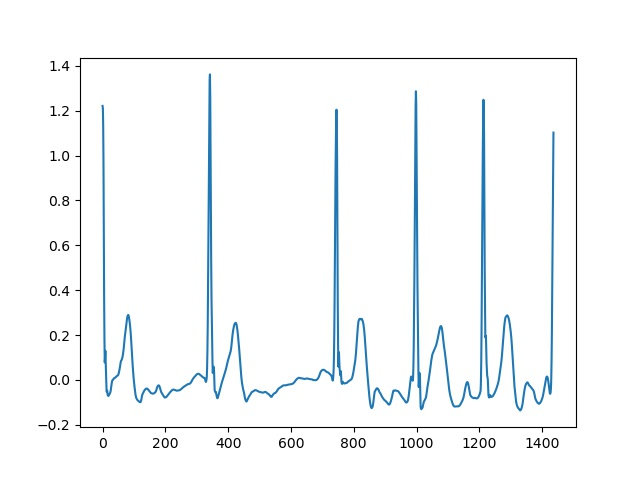

In [37]:
af = list(data_dir.glob('A/*'))
PIL.Image.open(str(af[0]))

In [38]:
batch_size = 32
img_height = 320
img_width = 320

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8497 files belonging to 4 classes.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 297 files belonging to 4 classes.


In [41]:
class_names = train_ds.class_names
print(class_names)

['A', 'N', 'O', '~']


In [42]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 320, 320, 3)
(32,)


In [43]:
for image_batch, labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 320, 320, 3)
(32,)


In [44]:
AUTOTUNE = tf.data.AUTOTUNE
print(AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

-1


In [45]:
normalization_layer = layers.Rescaling(1./255)

In [46]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 320, 320, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 320, 320, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 160, 160, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 160, 160, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 80, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 64)       

In [49]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
266/266 [==============================] - 12s 33ms/step - loss: 1.1258 - accuracy: 0.5831 - val_loss: 1.0638 - val_accuracy: 0.5253
Epoch 2/10
266/266 [==============================] - 8s 32ms/step - loss: 0.8505 - accuracy: 0.6228 - val_loss: 0.9131 - val_accuracy: 0.6229
Epoch 3/10
266/266 [==============================] - 8s 32ms/step - loss: 0.7848 - accuracy: 0.6626 - val_loss: 0.8766 - val_accuracy: 0.6330
Epoch 4/10
266/266 [==============================] - 8s 32ms/step - loss: 0.7348 - accuracy: 0.6868 - val_loss: 0.8247 - val_accuracy: 0.6195
Epoch 5/10
266/266 [==============================] - 8s 32ms/step - loss: 0.6943 - accuracy: 0.7079 - val_loss: 0.6550 - val_accuracy: 0.7340
Epoch 6/10
266/266 [==============================] - 8s 32ms/step - loss: 0.6328 - accuracy: 0.7373 - val_loss: 0.5956 - val_accuracy: 0.7576
Epoch 7/10
266/266 [==============================] - 8s 32ms/step - loss: 0.5442 - accuracy: 0.7803 - val_loss: 0.4855 - val_accuracy: 0.831

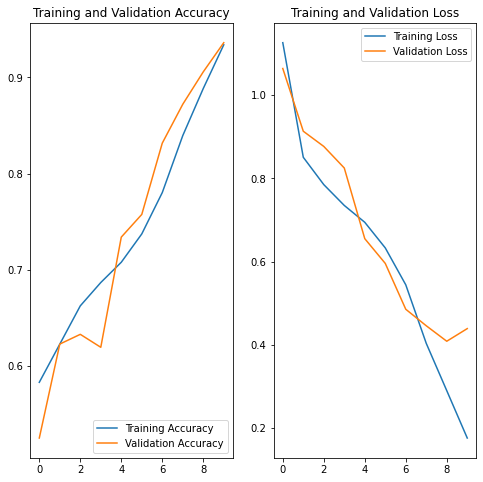

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()